In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import math

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
done="done"
directory="PetImages"
category=["cat","dog"]
imageList=[]
for x in category:
    path=os.path.join(directory,x)
    imageType=category.index(x)
    for image in os.listdir(path):
        try:
            imageArray=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
            resizeArray=cv2.resize(imageArray,(50,50))
            imageList.append([resizeArray,imageType])
        except Exception as e:
            pass

done

'done'

In [51]:
print(len(imageList))
X=[]
y=[]
newX=[]
for img,imgType in imageList:
    X.append(img)
    y.append(imgType)
X=np.array(X)
X=X.reshape(X.shape[0],-1)
done

24946


'done'

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

done

'done'

In [53]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10)
rfc.fit(X_train, y_train)
done

'done'

In [56]:
rfc.score(X_test, y_test)
y_pred=rfc.predict(X_test)
done

'done'

<Figure size 864x576 with 0 Axes>

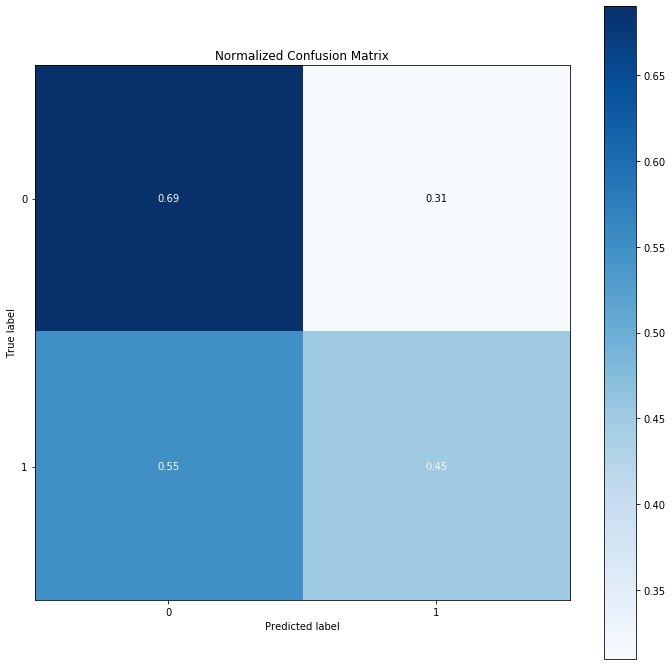

'done'

In [57]:
import scikitplot as skplt
plt.figure(figsize=(12,8))
f,ax=plt.subplots(1,1,figsize=(12,12))

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize='true',ax=ax)
plt.show()
done